In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from statistics import mode
from pandas_profiling import ProfileReport

# Modelling libs
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3109990389.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
test_final = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
train.describe()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8202.50000,22.951900,0.504058,1.696920,5.597640,1.673380,1.024020,0.845700,396.744560,343.496490,...,14.598400,40.098340,-20.593900,125.572130,14.008500,2.334800,12.907179,2.985135,3.080190,0.360069
std,2886.89568,10.547951,0.228211,0.764911,2.597797,0.751486,0.575427,0.536015,71.814197,35.520142,...,9.240523,2.297867,20.480989,27.624359,7.790539,1.333899,4.159773,4.712540,4.210632,0.494650
min,3203.00000,5.100000,0.101212,0.400000,0.600000,0.400000,0.000000,0.200000,283.200000,283.500000,...,0.000000,37.900000,-42.000000,96.700000,1.000000,1.000000,5.150000,-9.050000,-2.800000,0.016098
25%,5702.75000,13.700000,0.298696,1.000000,3.400000,1.000000,0.600000,0.400000,336.300000,312.700000,...,6.000000,37.900000,-42.000000,96.700000,7.000000,1.000000,9.300000,-0.200000,-0.600000,0.102143
50%,8202.50000,22.600000,0.507989,1.600000,5.600000,1.600000,1.000000,0.800000,386.500000,342.400000,...,15.000000,37.900000,-1.000000,152.000000,14.000000,2.000000,12.700000,2.800000,2.300000,0.206182
75%,10702.25000,32.100000,0.703826,2.400000,7.800000,2.400000,1.600000,1.200000,441.200000,365.400000,...,22.000000,42.500000,-1.000000,152.000000,21.000000,3.000000,16.250000,6.400000,5.300000,0.411745
max,13202.00000,42.000000,0.899184,3.000000,10.000000,3.000000,2.000000,2.600000,572.300000,423.300000,...,30.000000,42.500000,-1.000000,152.000000,27.000000,5.000000,23.750000,19.550000,16.700000,9.170477


### Findings
- There are some coloumns with  zero values
- coloumns have different scales

In [5]:
# Checking data types and null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   Tank Failure Pressure (bar)      10000 non-null  float64
 2   Liquid Ratio (%)                 10000 non-null  float64
 3   Tank Width (m)                   10000 non-null  float64
 4   Tank Length (m)                  10000 non-null  float64
 5   Tank Height (m)                  10000 non-null  float64
 6   BLEVE Height (m)                 10000 non-null  float64
 7   Vapour Height (m)                10000 non-null  float64
 8   Vapour Temperature (K)           10000 non-null  float64
 9   Liquid Temperature (K)           10000 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10000 non-null  int64  
 11  Obstacle Width (m)               10000 non-null  int64  
 12  Obstacle Height (m)

In [6]:
# No null values found data types are all correct only no changes needed.

In [7]:
train["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [8]:
#  Superheated == 0 and Subcooled == 1
train['new_status'] = train["Status"].replace(["Superheated",'Subcooled'], [0,1])
train.drop(columns=['Status','ID'],axis='y',inplace=True)

<Axes: >

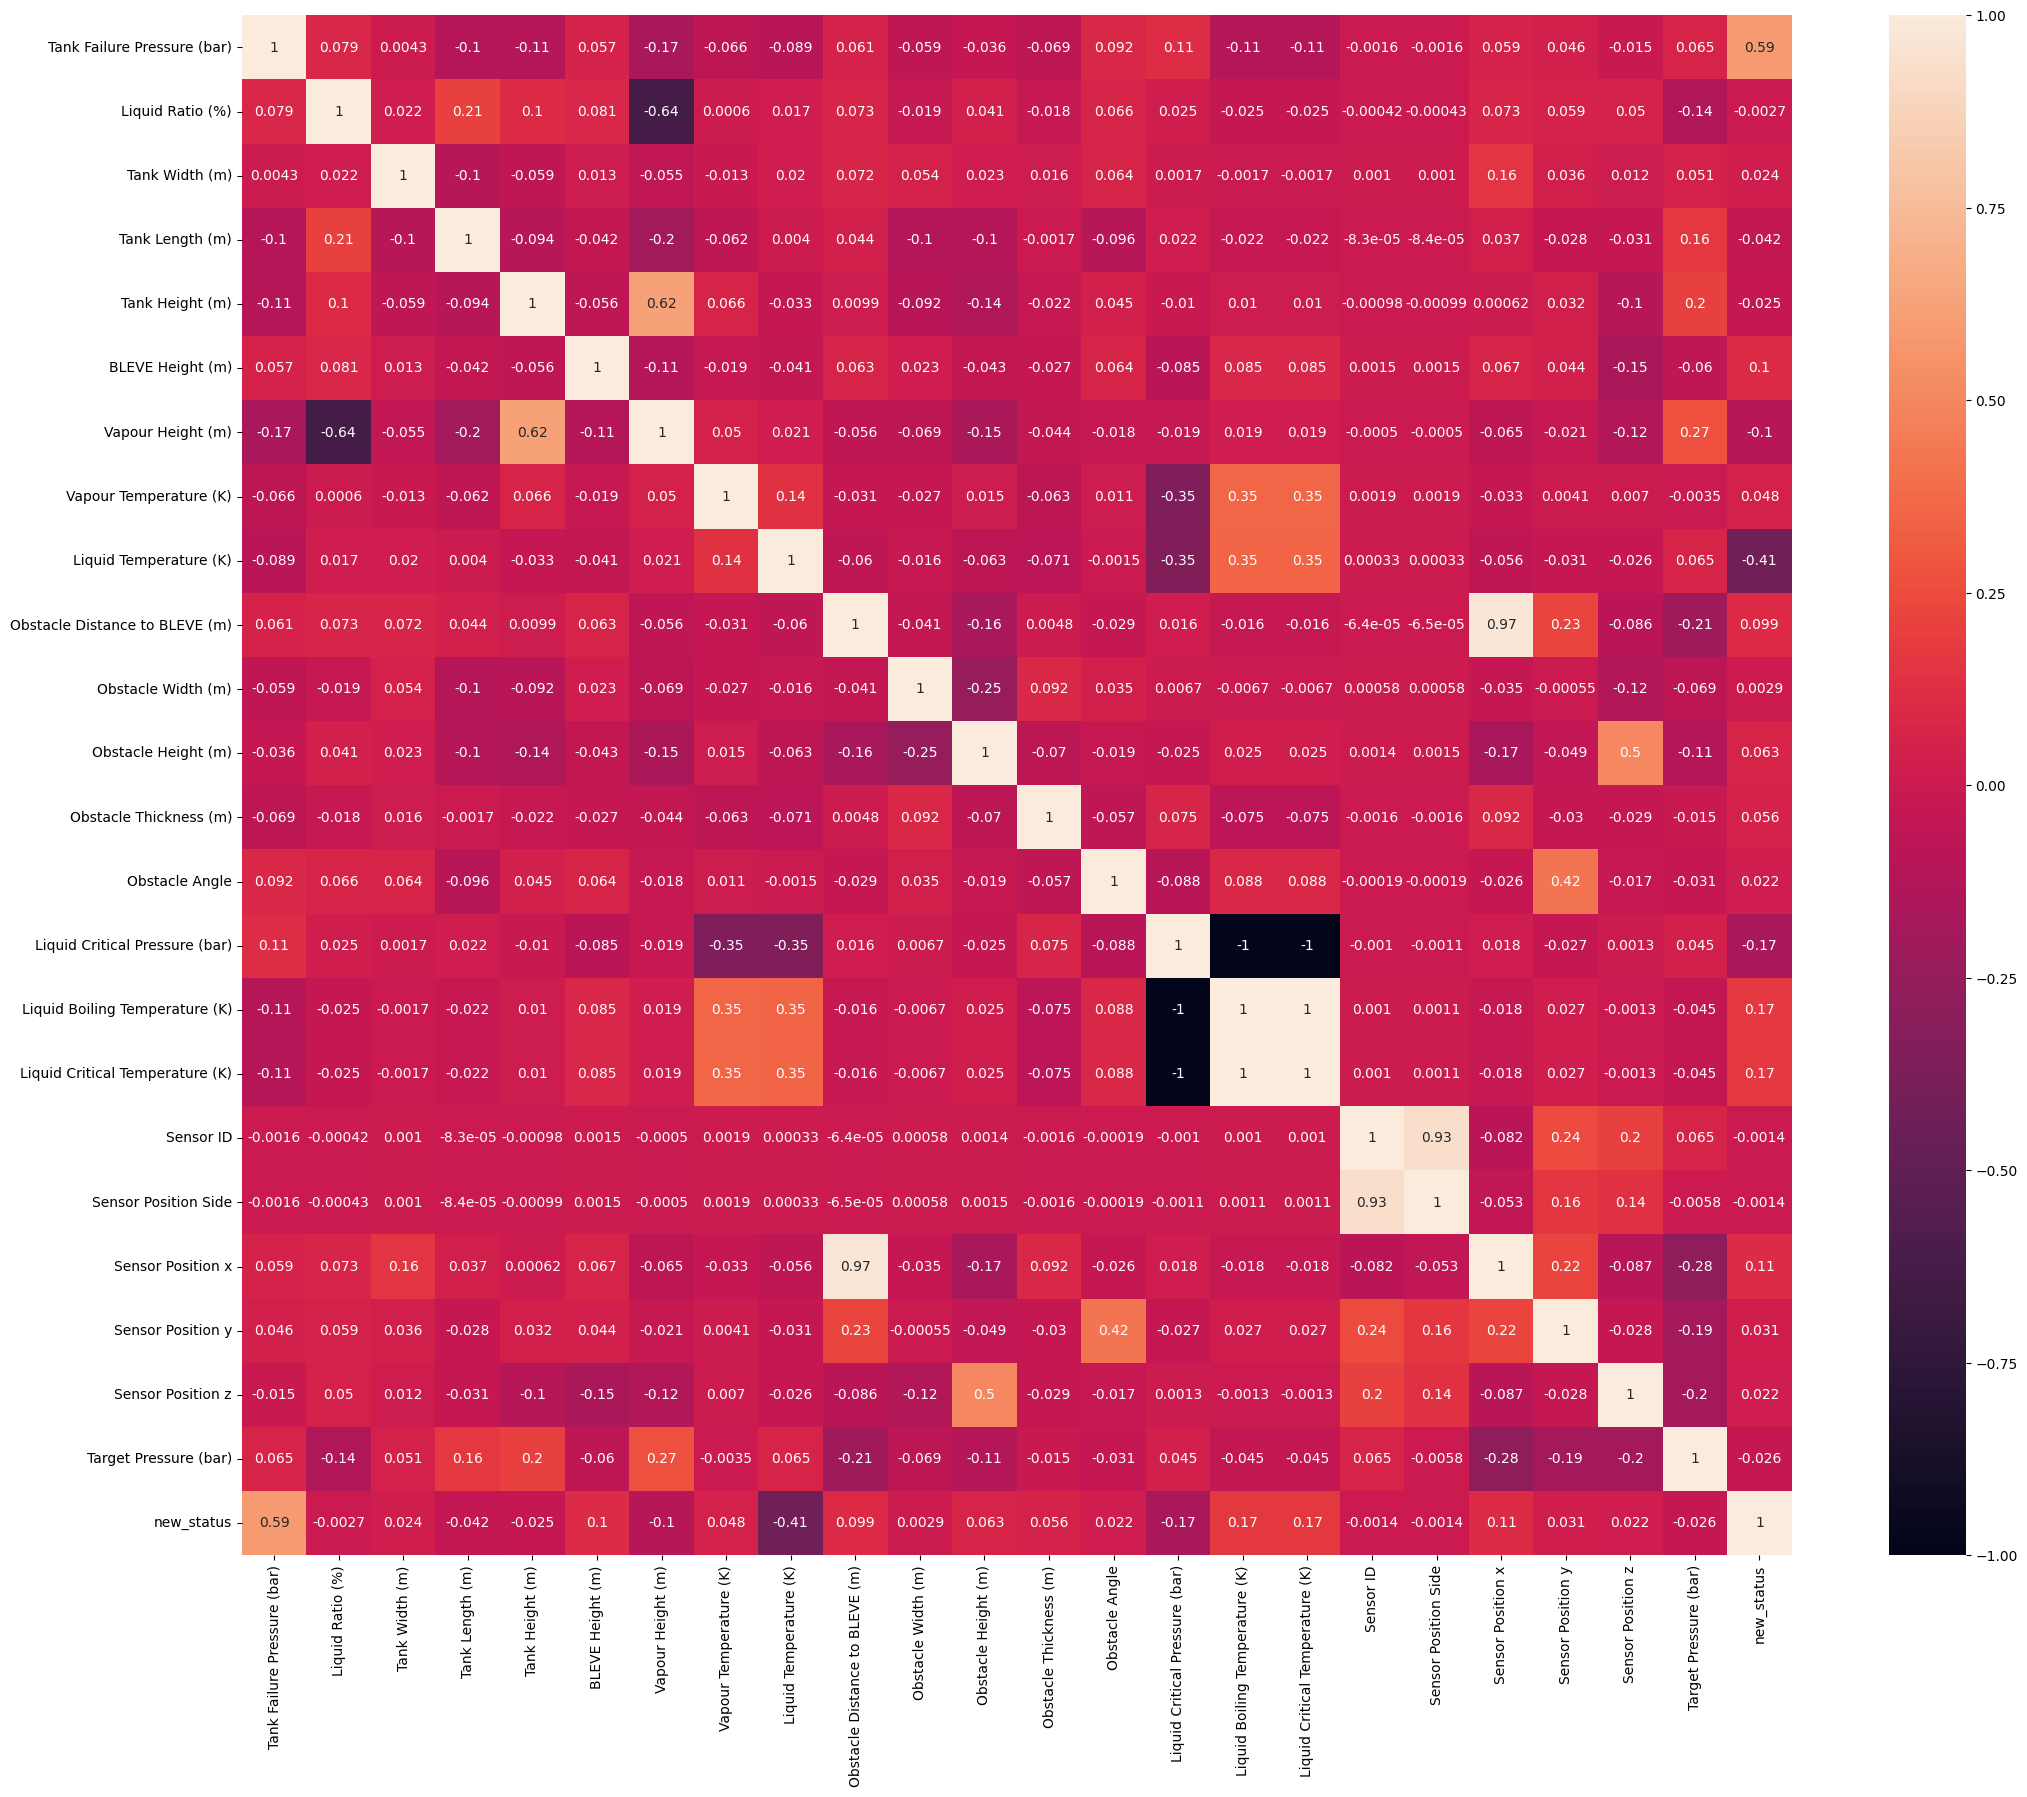

In [9]:
# Checking correlations
fig ,ax  = plt.subplots(figsize = (25,20))
sns.heatmap(train.corr() ,annot=True,ax=ax)

### Removing Columns:
- Liquid Critical Pressure (bar)  # High Correlation with others.
- Liquid Boiling Temperature  # High Correlation with others.
- Sensor Position Side   # target col is not much depending on it
- Obstacle Distance to BLEVE (m)  # Distance x is already given
- Liquid Ratio (%) * high corelation with vapour height

In [11]:
train.drop(columns=['Liquid Ratio (%)','Liquid Boiling Temperature (K)','Obstacle Distance to BLEVE (m)','Liquid Critical Pressure (bar)','Sensor Position Side'],axis='y',inplace=True)

<Axes: >

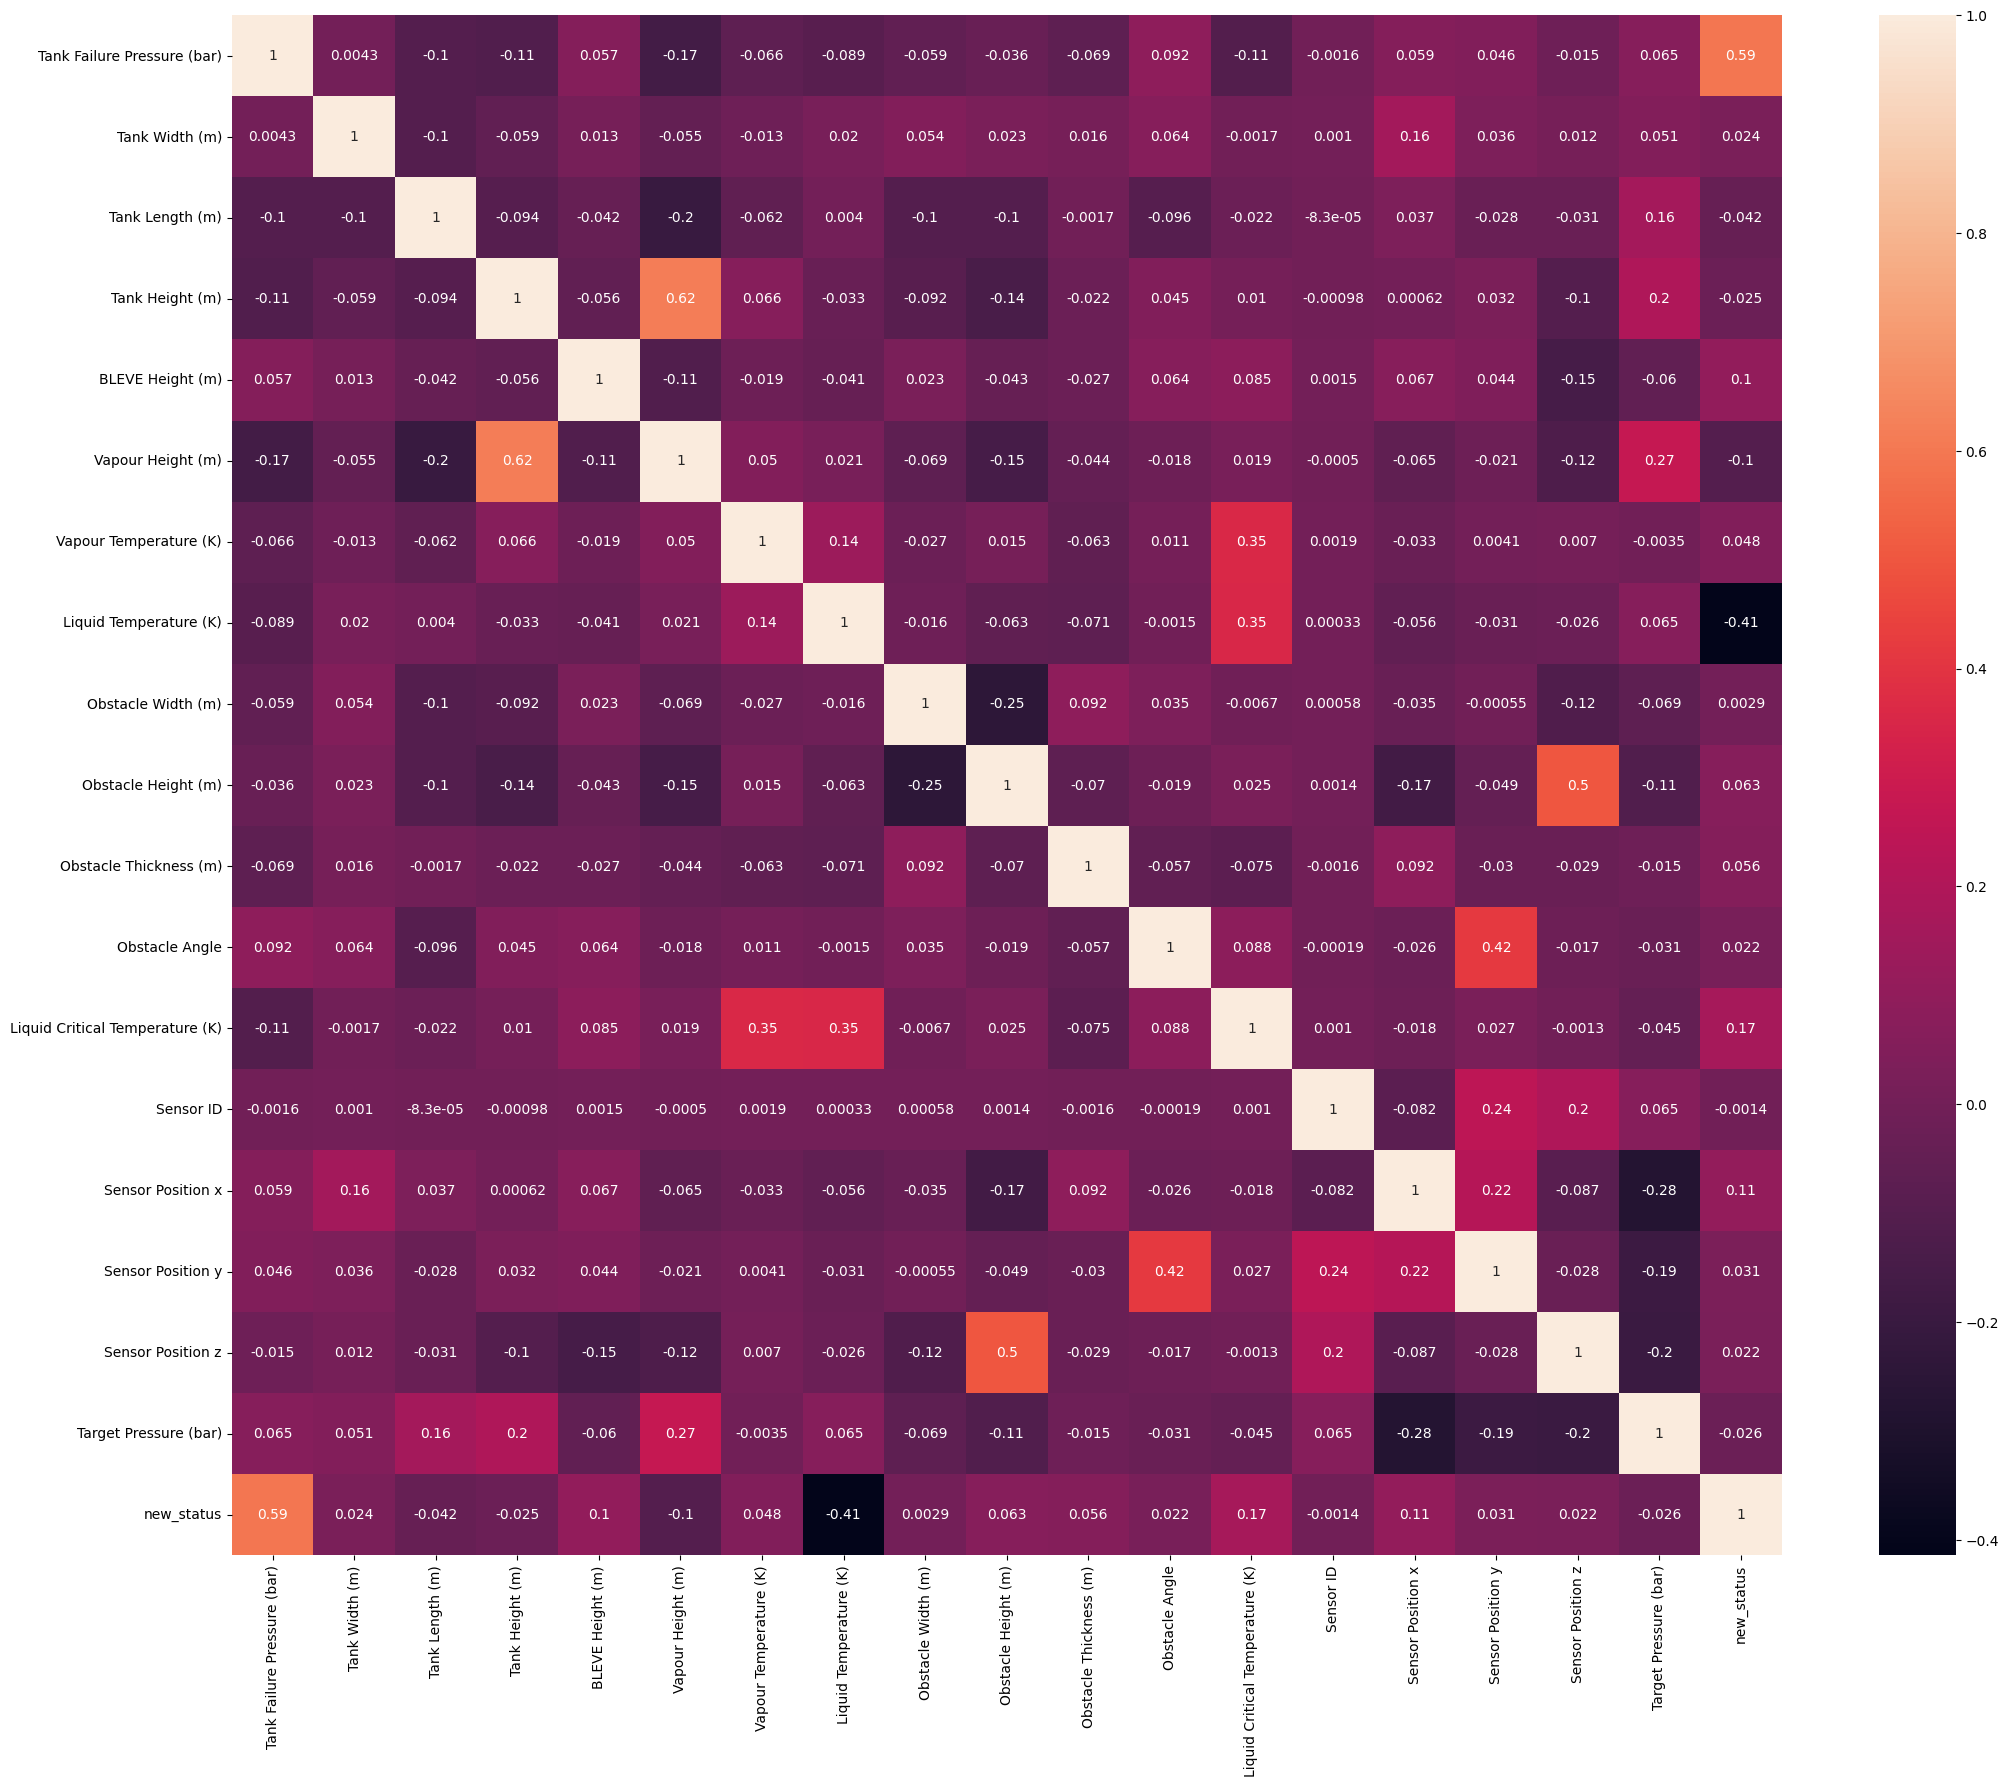

In [12]:
# checking correlation again
fig ,ax  = plt.subplots(figsize = (25,20))
sns.heatmap(train.corr() ,annot=True,ax=ax)

### Removing Columns:
- Vapour Temperature (K)  # target col is not much depending on it
- Obstacle Thickness (m)  # target col is not much depending on it
- Tank Failure Pressure (bar)  # target col is not much depending on it and Liquid Temperature (K)
- Liquid Temperature (K)  #  Liquid Temperature (K)

#### Not removing object height even though its a high corr because target variable is depending on it very much.

In [14]:
train.drop(columns=['Liquid Temperature (K)','Tank Failure Pressure (bar)','Vapour Temperature (K)','Obstacle Thickness (m)'],axis='y',inplace=True)

In [15]:
train

,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),new_status
0,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,18,12.15,7.90,10.7,0.199929,0
1,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,19,12.50,-2.95,-1.9,0.435681,0
2,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,20,12.50,-2.95,4.4,0.264031,0
3,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,21,12.50,-2.95,10.7,0.270576,0
4,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,22,12.50,-2.70,11.0,0.204675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,7.2,1.0,0.2,0.4,12,15,3,152.0,23,16.10,0.80,14.7,0.100168,1
9996,2.0,7.2,1.0,0.2,0.4,12,15,3,152.0,24,16.10,6.60,14.7,0.116293,1
9997,2.0,7.2,1.0,0.2,0.4,12,15,3,152.0,25,16.10,6.85,-0.2,0.112795,1
9998,2.0,7.2,1.0,0.2,0.4,12,15,3,152.0,26,16.10,6.85,7.1,0.126599,1


<Axes: >

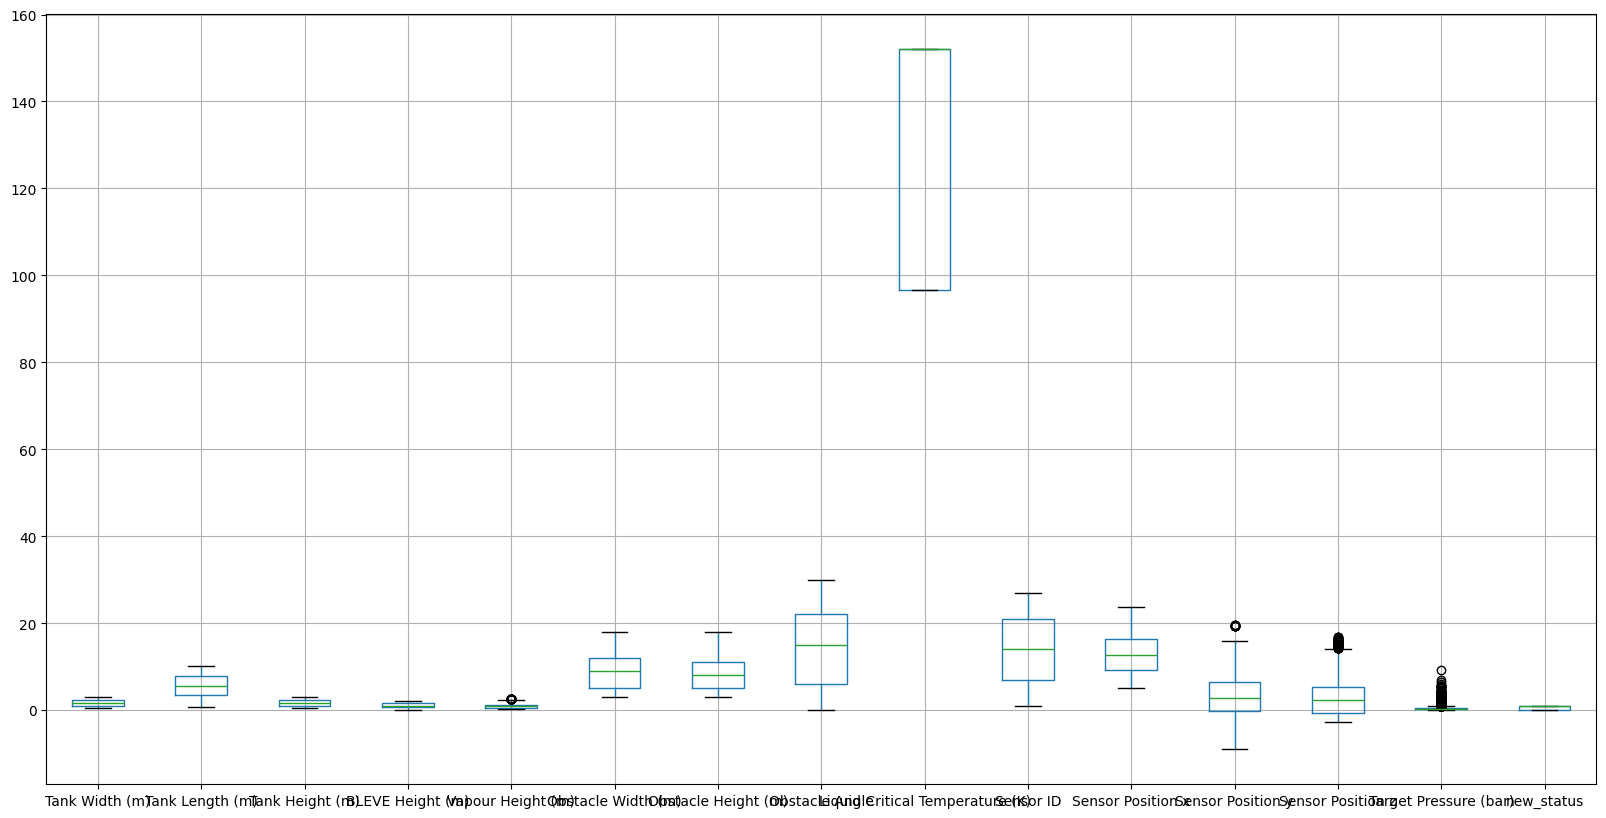

In [16]:
# Checking Outliers
train.boxplot(figsize=(20,10))

In [17]:
#Outlier Quantity in each variable
Outlier =[]

def outliers_IQR_test(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    outliers=[]
    for i in df:
        if i<=lower or i>=upper:
            outliers.append(i)
    return outliers

for i in train.columns:
    outliers_list = outliers_IQR_test(train[i])
    print(i,'--->',len(outliers_list))

Tank Width (m) ---> 0
Tank Length (m) ---> 0
Tank Height (m) ---> 0
BLEVE Height (m) ---> 0
Vapour Height (m) ---> 108
Obstacle Width (m) ---> 0
Obstacle Height (m) ---> 0
Obstacle Angle ---> 0
Liquid Critical Temperature (K) ---> 0
Sensor ID ---> 0
Sensor Position x ---> 0
Sensor Position y ---> 10
Sensor Position z ---> 91
Target Pressure (bar) ---> 882
new_status ---> 0


In [18]:
# Solving outliers in vapour hieght
train['Vapour Height (m)'].value_counts()

Vapour Height (m)
0.4    2025
0.6    1711
0.8    1296
0.2    1242
1.0     891
1.4     783
1.2     756
1.6     405
1.8     351
2.0     297
2.2     135
2.4      54
2.6      54
Name: count, dtype: int64

In [19]:
outliers_list = outliers_IQR_test(train['Vapour Height (m)'])
pd.DataFrame(outliers_list).value_counts()

2.4    54
2.6    54
Name: count, dtype: int64

In [20]:
# removing 2.4 and 2.6 from the data as 109 rows are nothing in front of 10000
train.drop(train[train['Vapour Height (m)']==2.4]['Vapour Height (m)'].index, axis=0 ,inplace=True)
train.drop(train[train['Vapour Height (m)']==2.6].index, axis=0 ,inplace=True)
train

,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),new_status
0,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,18,12.15,7.90,10.7,0.199929,0
1,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,19,12.50,-2.95,-1.9,0.435681,0
2,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,20,12.50,-2.95,4.4,0.264031,0
3,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,21,12.50,-2.95,10.7,0.270576,0
4,2.4,5.4,1.0,1.8,0.6,11,13,13,152.0,22,12.50,-2.70,11.0,0.204675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,7.2,1.0,0.2,0.4,12,15,3,152.0,23,16.10,0.80,14.7,0.100168,1
9996,2.0,7.2,1.0,0.2,0.4,12,15,3,152.0,24,16.10,6.60,14.7,0.116293,1
9997,2.0,7.2,1.0,0.2,0.4,12,15,3,152.0,25,16.10,6.85,-0.2,0.112795,1
9998,2.0,7.2,1.0,0.2,0.4,12,15,3,152.0,26,16.10,6.85,7.1,0.126599,1


In [21]:
10000-108  # everything is ok

9892

In [22]:
train.duplicated().sum()  #Check Duplicates

0

In [23]:
x = train.drop(columns="Target Pressure (bar)")
y = train[["Target Pressure (bar)"]]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=30)

In [26]:
# Initialize Standard Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
transformed_data = scaler.fit_transform(x_train)

# Convert transformed data back to DataFrame
x_train_transformed = pd.DataFrame(transformed_data, columns=x_train.columns)
x_train_transformed

,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,new_status
0,-1.435455,-0.693338,-1.152140,-1.087378,-0.445866,-0.478398,0.495772,-1.254279,-1.043007,-0.130723,-1.350121,-0.558916,-0.857998,0.763075
1,0.391677,0.150615,0.731402,0.651029,-0.445866,0.029561,-0.586521,-1.146481,-1.043007,-0.644718,0.517383,0.443343,0.233761,-1.310487
2,1.435752,-1.537291,-0.613985,0.303348,-0.445866,0.537519,1.307492,1.656279,0.958767,-0.644718,1.139884,2.191966,1.942601,0.763075
3,-1.435455,0.764399,-0.075830,0.651029,1.119759,-0.986356,2.660358,-0.607489,0.958767,1.539758,-0.069205,0.283408,0.898309,0.763075
4,0.391677,-0.923507,1.269557,-0.044333,0.728353,-0.732377,1.578065,-0.823086,-1.043007,0.254772,-0.943101,0.166122,-1.071603,0.763075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,1.174733,1.301460,-1.152140,-1.782740,-0.837272,-0.224418,-0.045375,-1.362078,-1.043007,0.383271,-0.153003,0.251421,0.162559,-1.310487
7909,0.391677,-1.230399,-1.152140,0.998711,-0.837272,0.029561,-1.127668,-0.391892,-1.043007,0.640268,1.319452,-0.932098,-1.119071,0.763075
7910,-0.652398,0.841122,0.462325,-1.435059,-0.445866,-0.224418,0.766345,-0.391892,0.958767,-1.158712,-0.344542,-0.217722,0.447366,-1.310487
7911,-1.174436,-0.923507,-0.075830,0.303348,-0.837272,-1.240335,0.766345,1.225085,0.958767,1.539758,-1.266323,0.517980,0.233761,-1.310487


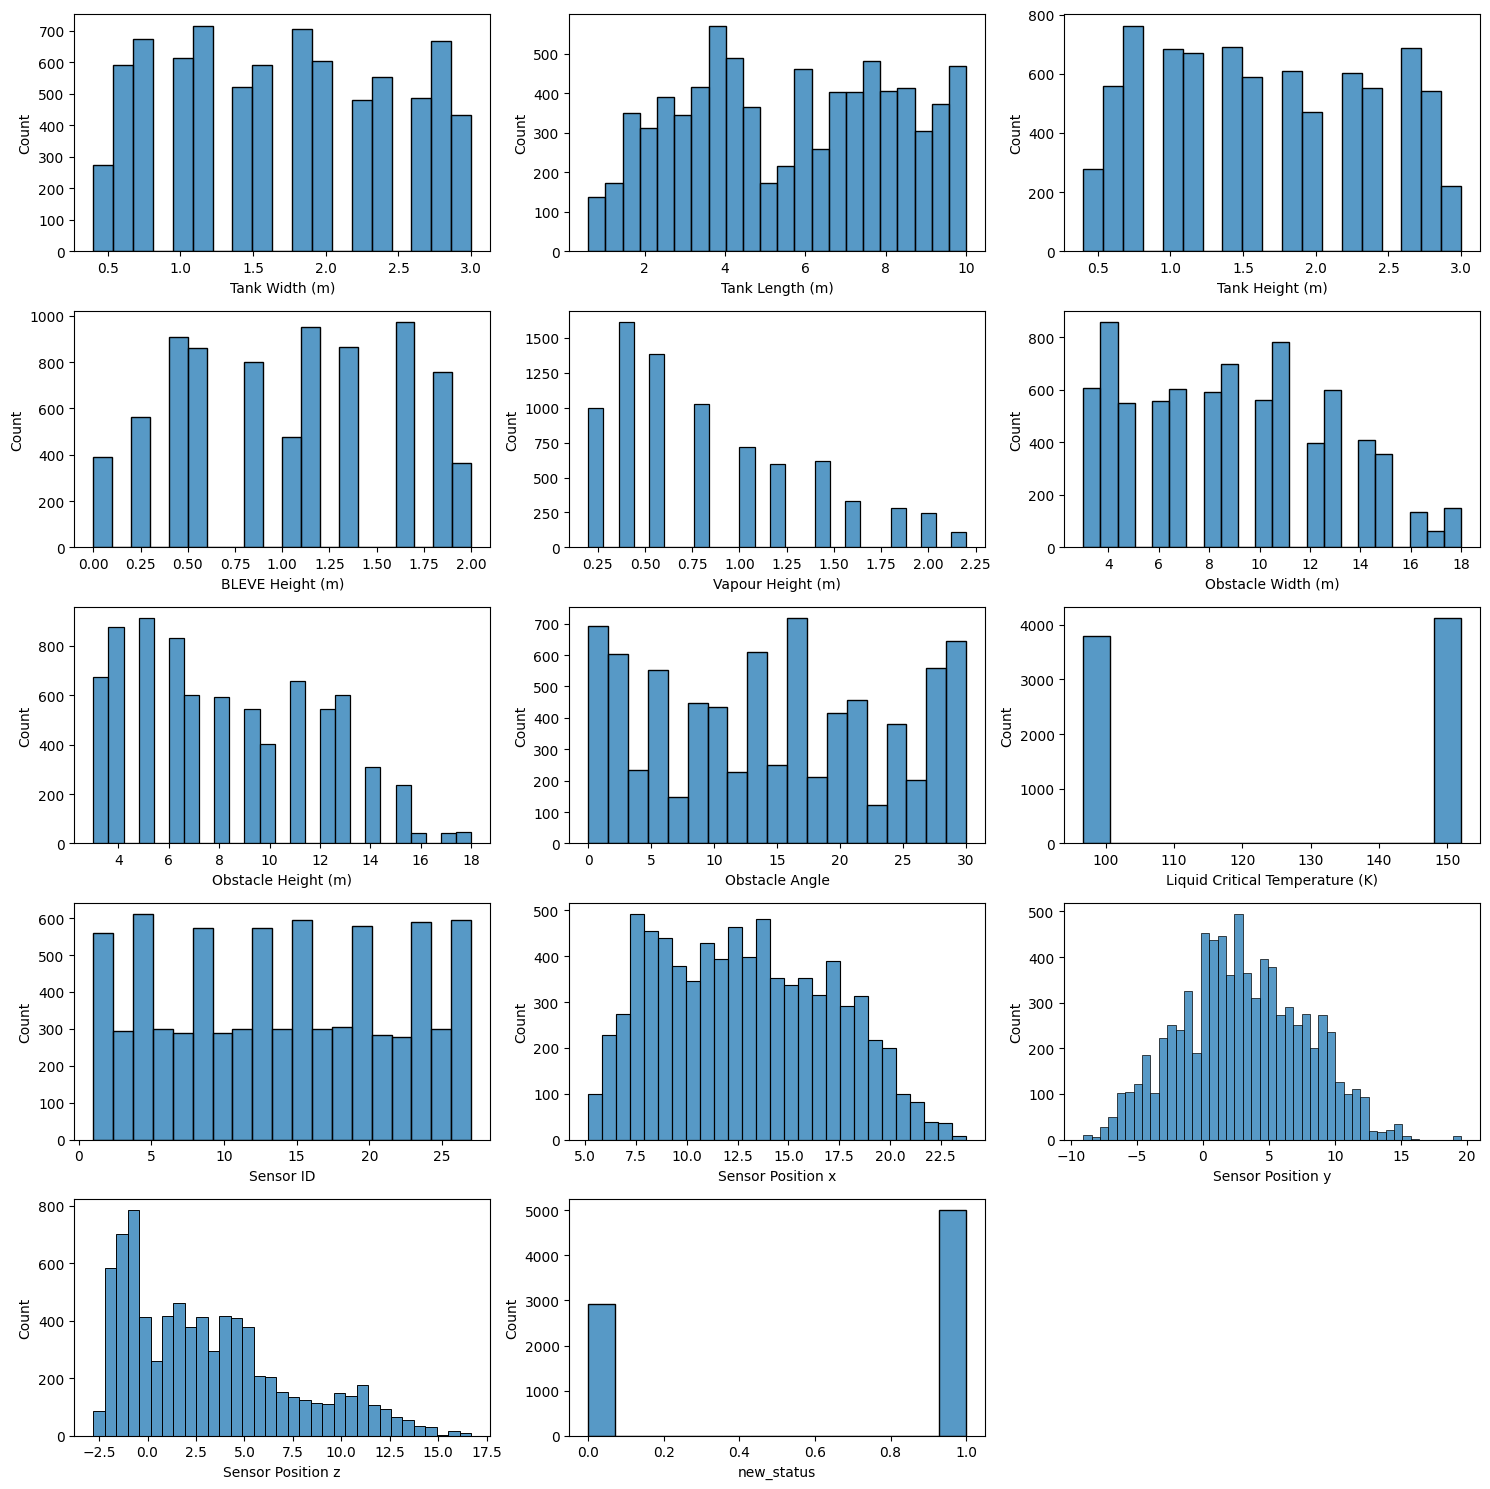

In [27]:
# Before transfoermation x_train plot
# Assuming x_train is a DataFrame with columns to plot
plt.figure(figsize=(15, 15), facecolor='white')

# Calculate the number of rows and columns needed based on the number of columns in x_train
num_cols = x_train.shape[1]
num_rows = int(np.ceil(num_cols / 3))  # 3 columns per row

plotnumber = 1
for column in x_train.columns:
    ax = plt.subplot(num_rows, 3, plotnumber)  # Adjusted to fit the number of columns
    sns.histplot(data=x_train[column])
    plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

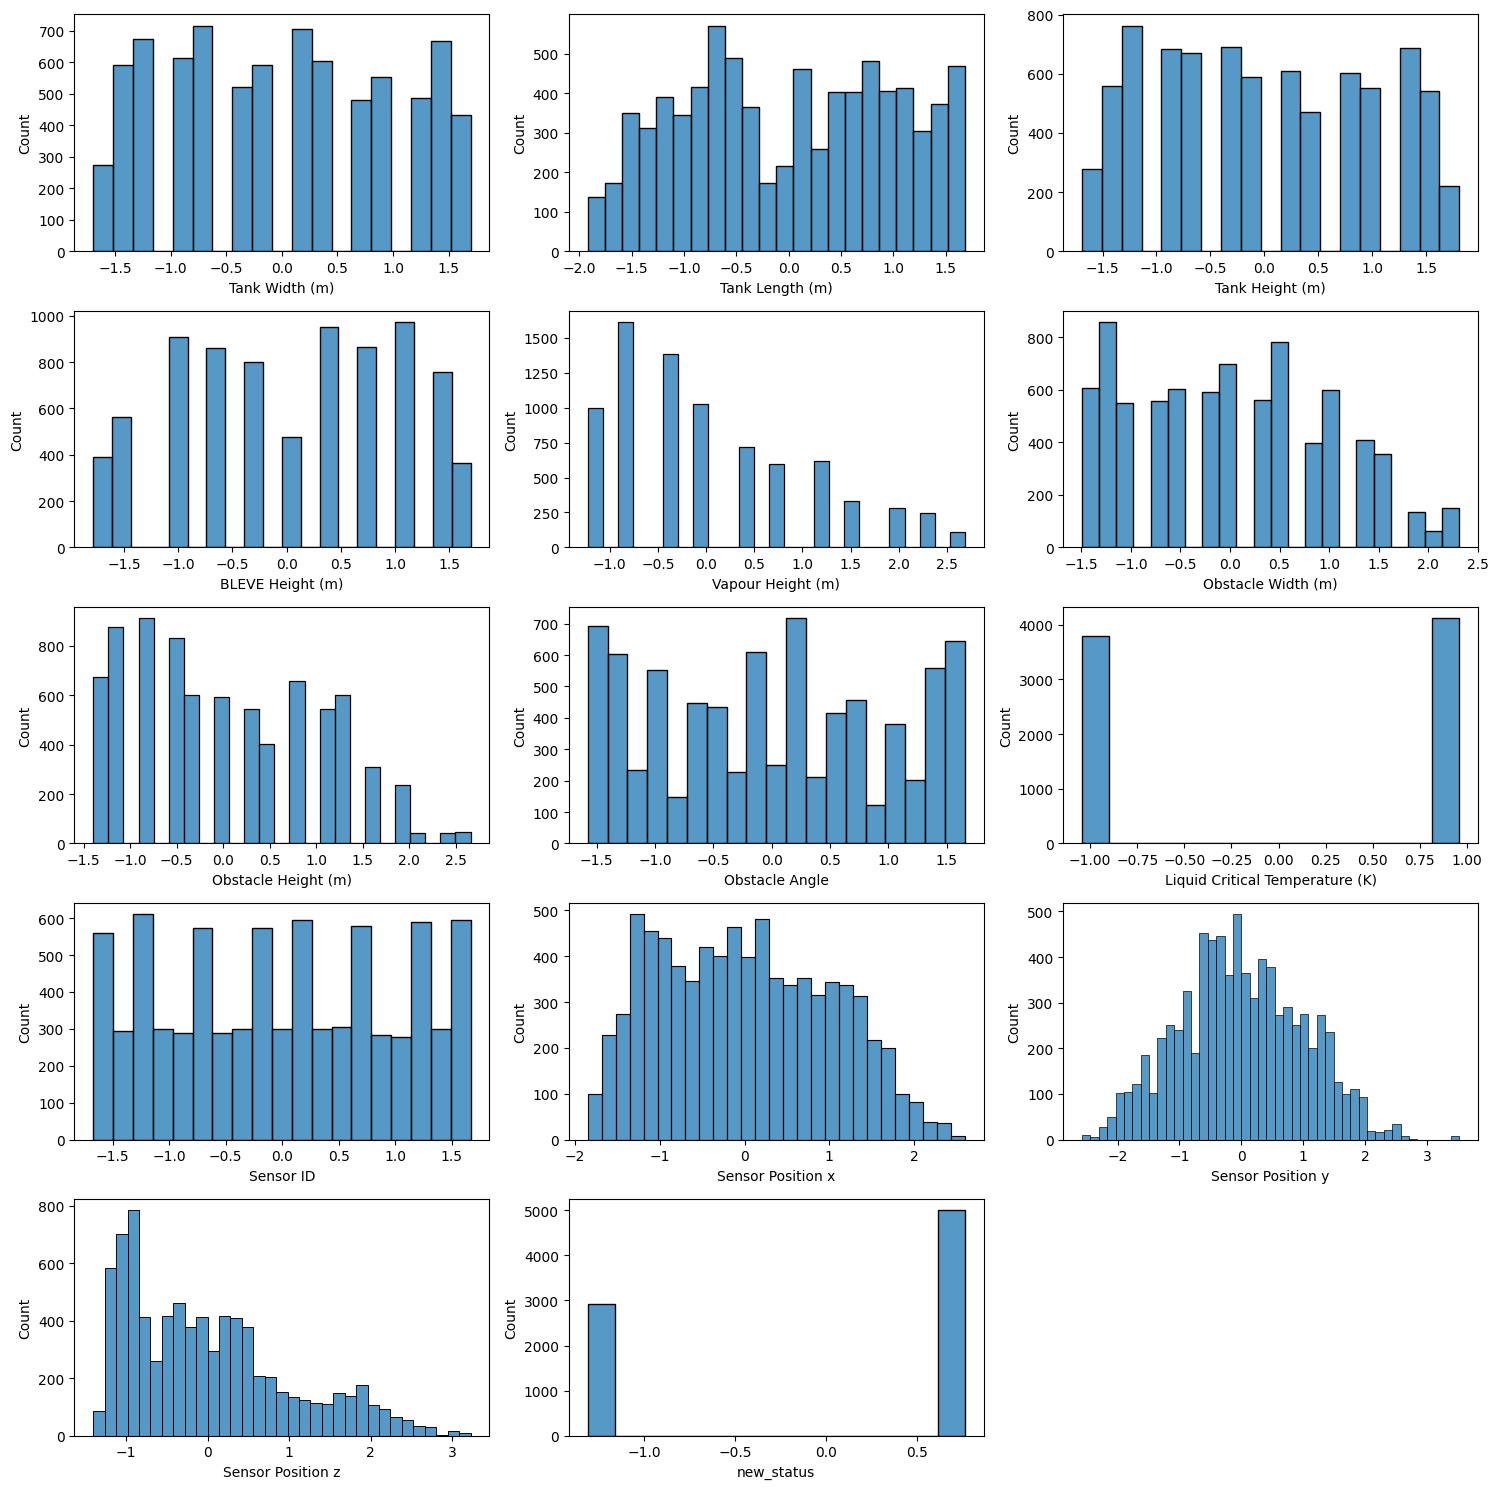

In [28]:
# After transformation
# Assuming x_train is a DataFrame with columns to plot
plt.figure(figsize=(15, 15), facecolor='white')

# Calculate the number of rows and columns needed based on the number of columns in x_train
num_cols = x_train_transformed.shape[1]
num_rows = int(np.ceil(num_cols / 3))  # 3 columns per row

plotnumber = 1
for column in x_train_transformed.columns:
    ax = plt.subplot(num_rows, 3, plotnumber)  # Adjusted to fit the number of columns
    sns.histplot(data=x_train_transformed[column])
    plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [30]:
# We are getting similar graph now transforming x_test
transformed_data = scaler.transform(x_test)

# Convert transformed data back to DataFrame
x_test_transformed = pd.DataFrame(transformed_data, columns=x_test.columns)
x_test_transformed

,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,new_status
0,0.130658,-0.156277,-0.344907,-1.087378,-0.445866,0.283540,-1.127668,0.254899,-1.043007,1.539758,1.151855,1.456265,-0.430788,-1.310487
1,-0.130361,-1.537291,0.731402,1.694074,1.902572,0.283540,-0.045375,-0.176295,0.958767,-0.259222,0.445556,-0.985410,0.423632,0.763075
2,0.130658,-1.000230,-1.152140,0.998711,-0.445866,-0.478398,0.495772,-1.254279,0.958767,-0.901715,1.211711,0.230096,-1.142805,0.763075
3,0.391677,-1.460568,0.462325,1.694074,-0.837272,-0.224418,-0.315948,1.332884,-1.043007,1.154262,-0.356513,0.422019,0.423632,0.763075
4,0.652695,-0.463169,-0.344907,0.998711,-0.837272,0.283540,0.766345,-1.362078,-1.043007,-1.030213,0.206132,-0.558916,1.396721,-1.310487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,-0.652398,-1.000230,1.000480,1.346392,-0.054460,-0.732377,-0.857095,0.901690,-1.043007,0.383271,0.637095,1.317655,-0.668127,-1.310487
1975,1.435752,-1.537291,-0.613985,0.303348,-0.445866,0.537519,1.307492,1.656279,0.958767,1.282761,0.864547,2.191966,2.013802,0.763075
1976,-0.391380,-0.539892,0.731402,-0.739696,-0.445866,0.029561,-1.398241,-1.577675,0.958767,0.383271,1.618731,0.272746,-0.596925,0.763075
1977,-0.913417,0.457507,0.193247,-1.435059,-0.837272,0.791499,0.766345,-1.469876,0.958767,-1.544208,-1.086755,-1.881046,0.471100,0.763075


In [31]:
# Model making
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    #"SVR": SVR
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_transformed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train_transformed)
    y_test_pred = model.predict(x_test_transformed)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3982
- Mean Absolute Error: 0.2417
- R2 Score: 0.2875
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4456
- Mean Absolute Error: 0.2536
- R2 Score: 0.2854


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4717
- Mean Absolute Error: 0.2777
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5273
- Mean Absolute Error: 0.2955
- R2 Score: -0.0010


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3982
- Mean Absolute Error: 0.2417
- R2 Score: 0.2875
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4456
- Mean Absolute Error: 0.2536
- R2 Score: 0.2854


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2632
- Mean Absolute Error: 0.1427
- R2 Score: 0.6887
----------------------

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0607
- Mean Absolute Error: 0.0226
- R2 Score: 0.9834
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1613
- Mean Absolute Error: 0.0623
- R2 Score: 0.9064


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0422
- Mean Absolute Error: 0.0272
- R2 Score: 0.9920
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1337
- Mean Absolute Error: 0.0618
- R2 Score: 0.9356




C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5692
- Mean Absolute Error: 0.5306
- R2 Score: -0.4556
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5860
- Mean Absolute Error: 0.5303
- R2 Score: -0.2360




### We are getting best results from random forest and xgb regressor
#### For xgb regressor we dont even need hyper parameter tuning as result is already satisfying

In [48]:
# Saving Model
import pickle
model = models['XGBRegressor']
file = 'final_model_XGB.sav'
pickle.dump(model,open(file,'wb'))

In [50]:
# Now Predicting values of test.csv file
# But before we need to transform that too
test_final

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,1,1,12.05,-5.6,-1.0
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,2,1,12.05,-5.6,1.3
2,2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,3,1,12.05,-5.6,3.6
3,3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,4,1,12.05,0.2,-1.0
4,4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,5,1,12.05,0.2,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,3198,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,13,Superheated,37.9,-1,152.0,13,2,12.15,2.6,-1.9
3199,3199,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,13,Superheated,37.9,-1,152.0,14,2,12.15,2.6,4.4
3200,3200,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,13,Superheated,37.9,-1,152.0,15,2,12.15,2.6,10.7
3201,3201,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,...,13,Superheated,37.9,-1,152.0,16,2,12.15,7.9,-1.9


In [51]:
# Transforming test_final
#  Superheated == 0 and Subcooled == 1
test_final['new_status'] = test_final["Status"].replace(["Superheated",'Subcooled'], [0,1])
test_final.drop(columns=['Status','ID'],axis='y',inplace=True)

test_final.drop(columns=['Liquid Ratio (%)','Liquid Boiling Temperature (K)','Obstacle Distance to BLEVE (m)','Liquid Critical Pressure (bar)','Sensor Position Side'],axis='y',inplace=True)
test_final.drop(columns=['Liquid Temperature (K)','Tank Failure Pressure (bar)','Vapour Temperature (K)','Obstacle Thickness (m)'],axis='y',inplace=True)

# We are getting similar graph now transforming x_test
transformed_data = scaler.transform(test_final)

# Convert transformed data back to DataFrame
x_test_final_transformed = pd.DataFrame(transformed_data, columns=test_final.columns)
x_test_final_transformed

,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,new_status
0,1.435752,1.148014,0.731402,-1.087378,1.511166,0.791499,-0.857095,-1.469876,0.958767,-1.672706,-0.200888,-1.838396,-0.976668,-1.310487
1,1.435752,1.148014,0.731402,-1.087378,1.511166,0.791499,-0.857095,-1.469876,0.958767,-1.544208,-0.200888,-1.838396,-0.430788,-1.310487
2,1.435752,1.148014,0.731402,-1.087378,1.511166,0.791499,-0.857095,-1.469876,0.958767,-1.415709,-0.200888,-1.838396,0.115091,-1.310487
3,1.435752,1.148014,0.731402,-1.087378,1.511166,0.791499,-0.857095,-1.469876,0.958767,-1.287210,-0.200888,-0.601566,-0.976668,-1.310487
4,1.435752,1.148014,0.731402,-1.087378,1.511166,0.791499,-0.857095,-1.469876,0.958767,-1.158712,-0.200888,-0.601566,-0.430788,-1.310487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,0.913714,-0.079554,-0.883062,1.346392,-0.445866,0.537519,1.307492,-0.176295,0.958767,-0.130723,-0.176946,-0.089774,-1.190273,-1.310487
3199,0.913714,-0.079554,-0.883062,1.346392,-0.445866,0.537519,1.307492,-0.176295,0.958767,-0.002225,-0.176946,-0.089774,0.304962,-1.310487
3200,0.913714,-0.079554,-0.883062,1.346392,-0.445866,0.537519,1.307492,-0.176295,0.958767,0.126274,-0.176946,-0.089774,1.800197,-1.310487
3201,0.913714,-0.079554,-0.883062,1.346392,-0.445866,0.537519,1.307492,-0.176295,0.958767,0.254772,-0.176946,1.040434,-1.190273,-1.310487


In [52]:
# Predicting values for submission
final_submission = model.predict(x_test_final_transformed)

In [54]:
final_submission = pd.DataFrame(final_submission,columns=['Target Pressure (bar)'])
final_submission

,Target Pressure (bar)
0,0.090504
1,0.151117
2,0.225380
3,0.176707
4,0.194337
...,...
3198,0.677643
3199,0.476458
3200,0.306784
3201,0.383464


In [55]:
final_submission.to_csv('final_submission.csv', index_label='ID')

In [72]:
transformed_data = scaler.transform(x)

# Convert transformed data back to DataFrame
x_transformed = pd.DataFrame(transformed_data, columns=x.columns)
x_transformed

,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,new_status
0,0.913714,-0.079554,-0.883062,1.346392,-0.445866,0.537519,1.307492,-0.176295,0.958767,0.511770,-0.176946,1.040434,1.800197,-1.310487
1,0.913714,-0.079554,-0.883062,1.346392,-0.445866,0.537519,1.307492,-0.176295,0.958767,0.640268,-0.093147,-1.273293,-1.190273,-1.310487
2,0.913714,-0.079554,-0.883062,1.346392,-0.445866,0.537519,1.307492,-0.176295,0.958767,0.768767,-0.093147,-1.273293,0.304962,-1.310487
3,0.913714,-0.079554,-0.883062,1.346392,-0.445866,0.537519,1.307492,-0.176295,0.958767,0.897265,-0.093147,-1.273293,1.800197,-1.310487
4,0.913714,-0.079554,-0.883062,1.346392,-0.445866,0.537519,1.307492,-0.176295,0.958767,1.025764,-0.093147,-1.219981,1.871399,-1.310487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,0.391677,0.610953,-0.883062,-1.435059,-0.837272,0.791499,1.848638,-1.254279,0.958767,1.154262,0.768778,-0.473618,2.749553,0.763075
9888,0.391677,0.610953,-0.883062,-1.435059,-0.837272,0.791499,1.848638,-1.254279,0.958767,1.282761,0.768778,0.763213,2.749553,0.763075
9889,0.391677,0.610953,-0.883062,-1.435059,-0.837272,0.791499,1.848638,-1.254279,0.958767,1.411260,0.768778,0.816525,-0.786797,0.763075
9890,0.391677,0.610953,-0.883062,-1.435059,-0.837272,0.791499,1.848638,-1.254279,0.958767,1.539758,0.768778,0.816525,0.945777,0.763075


In [92]:
# Trying to tune XGB using optuna

import optuna
def objective(trail, data=x_transformed, target=y):
    train_x,test_x,train_y,test_y = train_test_split(data,target,test_size=0.10,random_state=30)
    param = {
        'tree_method':'gpu_hist',
        'lambda':trail.suggest_loguniform('lamba',1e-4,10),
        'alpha': trail.suggest_loguniform('alpha',1e-4,10),
        'colsample_bytree': trail.suggest_categorical('colsample_bytree',[.3,.4,.5,.6,.7,.9,1]),
        'subsample':trail.suggest_categorical('subsample',[.3,.4,.5,.6,.7,.9,1]),
        'learning_rate': trail.suggest_categorical('learning_rate',[.00001,.0003,.008,.02,.01,1]),
        'n_estimator' : 3000,
        'max_depth': trail.suggest_categorical('max_depth', [3,5,7,9,10,11]),
        'random_state': trail.suggest_categorical('random_state',[10,20,30,2000,243123]),
        'min_child_weight': trail.suggest_int('min_child_weight',1,200),
        'verbosity':3
    }
    xgb_reg_model = XGBRegressor(**param)
    xgb_reg_model.fit(train_x,train_y,eval_set = [(test_x,test_y)],verbose=True)
    pred_xgb = xgb_reg_model.predict(test_x)
    r2 = r2_score(test_y,pred_xgb)
    #rmse = mean_squared_error(test_y,pred_xgb)
    mape = mean_absolute_percentage_error(test_y,pred_xgb)
    #return rmse
    return r2

In [93]:
find_param = optuna.create_study(direction='maximize')
find_param.optimize(objective,n_trials=10)
find_param.best_trial.params

[I 2024-05-04 20:54:32,775] A new study created in memory with name: no-name-635dea5a-7424-43ed-9429-b718df78c283


[20:54:32] ======== Monitor (0): HostSketchContainer ========
[20:54:32] AllReduce: 0.00059s, 1 calls @ 590us

[20:54:32] MakeCuts: 0.000634s, 1 calls @ 634us

[20:54:32] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 5
[20:54:32] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:744: [GPU Hist]: Configure
[20:54:32] ======== Monitor (0):  ========
[20:54:32] InitCompressedData: 0.000427s, 1 calls @ 427us

[20:54:32] ======== Monitor (0):  ========
[20:54:32] InitCompressedData: 0.000147s, 1 calls @ 147us

[0]	validation_0-rmse:0.57243
[1]	validation_0-rmse:0.57160
[2]	validation_0-rmse:0.57076


C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[3]	validation_0-rmse:0.56902
[4]	validation_0-rmse:0.56779
[5]	validation_0-rmse:0.56697
[6]	validation_0-rmse:0.56531
[7]	validation_0-rmse:0.56370
[8]	validation_0-rmse:0.56310
[9]	validation_0-rmse:0.56173
[10]	validation_0-rmse:0.56128
[11]	validation_0-rmse:0.56040
[12]	validation_0-rmse:0.55860
[13]	validation_0-rmse:0.55809
[14]	validation_0-rmse:0.55660
[15]	validation_0-rmse:0.55484
[16]	validation_0-rmse:0.55405
[17]	validation_0-rmse:0.55261
[18]	validation_0-rmse:0.55196
[19]	validation_0-rmse:0.55104
[20]	validation_0-rmse:0.55071
[21]	validation_0-rmse:0.54976
[22]	validation_0-rmse:0.54895
[23]	validation_0-rmse:0.54852
[24]	validation_0-rmse:0.54733
[25]	validation_0-rmse:0.54697
[26]	validation_0-rmse:0.54638
[27]	validation_0-rmse:0.54601
[28]	validation_0-rmse:0.54547
[29]	validation_0-rmse:0.54514
[30]	validation_0-rmse:0.54461
[31]	validation_0-rmse:0.54431
[32]	validation_0-rmse:0.54367
[33]	validation_0-rmse:0.54320
[34]	validation_0-rmse:0.54171
[35]	validation

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:36,018] Trial 0 finished with value: 0.25043978420873425 and parameters: {'lamba': 0.0007436086244685601, 'alpha': 0.13360052885557494, 'colsample_bytree': 0.4, 'subsample': 0.3, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 2000, 'min_child_weight': 72}. Best is trial 0 with value: 0.25043978420873425.


[20:54:36] ======== Monitor (0): HostSketchContainer ========
[20:54:36] AllReduce: 0.000562s, 1 calls @ 562us

[20:54:36] MakeCuts: 0.00061s, 1 calls @ 610us

[20:54:36] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 5
[20:54:36] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:744: [GPU Hist]: Configure
[20:54:36] ======== Monitor (0):  ========
[20:54:36] InitCompressedData: 0.000293s, 1 calls @ 293us

[20:54:36] ======== Monitor (0):  ========
[20:54:36] InitCompressedData: 0.000137s, 1 calls @ 137us

[0]	validation_0-rmse:0.57176
[1]	validation_0-rmse:0.56978


C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[2]	validation_0-rmse:0.56924
[3]	validation_0-rmse:0.56826
[4]	validation_0-rmse:0.56683
[5]	validation_0-rmse:0.56634
[6]	validation_0-rmse:0.56550
[7]	validation_0-rmse:0.56514
[8]	validation_0-rmse:0.56363
[9]	validation_0-rmse:0.56260
[10]	validation_0-rmse:0.56211
[11]	validation_0-rmse:0.56097
[12]	validation_0-rmse:0.56047
[13]	validation_0-rmse:0.55978
[14]	validation_0-rmse:0.55814
[15]	validation_0-rmse:0.55764
[16]	validation_0-rmse:0.55657
[17]	validation_0-rmse:0.55611
[18]	validation_0-rmse:0.55441
[19]	validation_0-rmse:0.55333
[20]	validation_0-rmse:0.55236
[21]	validation_0-rmse:0.55085
[22]	validation_0-rmse:0.54926
[23]	validation_0-rmse:0.54892
[24]	validation_0-rmse:0.54730
[25]	validation_0-rmse:0.54705
[26]	validation_0-rmse:0.54658
[27]	validation_0-rmse:0.54607
[28]	validation_0-rmse:0.54521
[29]	validation_0-rmse:0.54337
[30]	validation_0-rmse:0.54276
[31]	validation_0-rmse:0.54213
[32]	validation_0-rmse:0.54038
[33]	validation_0-rmse:0.53944
[34]	validation_

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:39,063] Trial 1 finished with value: 0.2614758764812589 and parameters: {'lamba': 1.80439402737099, 'alpha': 0.905160093383288, 'colsample_bytree': 0.3, 'subsample': 0.9, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 20, 'min_child_weight': 66}. Best is trial 1 with value: 0.2614758764812589.


[20:54:39] ======== Monitor (0): HostSketchContainer ========
[20:54:39] AllReduce: 0.000585s, 1 calls @ 585us

[20:54:39] MakeCuts: 0.000632s, 1 calls @ 632us

[20:54:39] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 5
[20:54:39] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:744: [GPU Hist]: Configure
[20:54:39] ======== Monitor (0):  ========
[20:54:39] InitCompressedData: 0.000287s, 1 calls @ 287us

[20:54:39] ======== Monitor (0):  ========
[20:54:39] InitCompressedData: 0.000127s, 1 calls @ 127us

[0]	validation_0-rmse:0.57111
[1]	validation_0-rmse:0.56904
[2]	validation_0-rmse:0.56718
[3]	validation_0-rmse:0.56546


C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[4]	validation_0-rmse:0.56364
[5]	validation_0-rmse:0.56159
[6]	validation_0-rmse:0.55959
[7]	validation_0-rmse:0.55803
[8]	validation_0-rmse:0.55616
[9]	validation_0-rmse:0.55419
[10]	validation_0-rmse:0.55254
[11]	validation_0-rmse:0.55093
[12]	validation_0-rmse:0.54923
[13]	validation_0-rmse:0.54769
[14]	validation_0-rmse:0.54584
[15]	validation_0-rmse:0.54398
[16]	validation_0-rmse:0.54232
[17]	validation_0-rmse:0.54059
[18]	validation_0-rmse:0.53899
[19]	validation_0-rmse:0.53741
[20]	validation_0-rmse:0.53587
[21]	validation_0-rmse:0.53440
[22]	validation_0-rmse:0.53303
[23]	validation_0-rmse:0.53145
[24]	validation_0-rmse:0.53005
[25]	validation_0-rmse:0.52855
[26]	validation_0-rmse:0.52692
[27]	validation_0-rmse:0.52555
[28]	validation_0-rmse:0.52389
[29]	validation_0-rmse:0.52247
[30]	validation_0-rmse:0.52103
[31]	validation_0-rmse:0.51943
[32]	validation_0-rmse:0.51804
[33]	validation_0-rmse:0.51667
[34]	validation_0-rmse:0.51533
[35]	validation_0-rmse:0.51404
[36]	validatio

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:41,563] Trial 2 finished with value: 0.37671502835689574 and parameters: {'lamba': 0.00020680868462500673, 'alpha': 0.007067327786747054, 'colsample_bytree': 1, 'subsample': 0.3, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 2000, 'min_child_weight': 86}. Best is trial 2 with value: 0.37671502835689574.


[20:54:41] ======== Monitor (0): HostSketchContainer ========
[20:54:41] AllReduce: 0.000575s, 1 calls @ 575us

[20:54:41] MakeCuts: 0.000635s, 1 calls @ 635us

[20:54:41] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 5
[20:54:41] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:744: [GPU Hist]: Configure
[20:54:41] ======== Monitor (0):  ========
[20:54:41] InitCompressedData: 0.000336s, 1 calls @ 336us

[20:54:41] ======== Monitor (0):  ========
[20:54:41] InitCompressedData: 0.000144s, 1 calls @ 144us

[0]	validation_0-rmse:0.57280
[1]	validation_0-rmse:0.57278
[2]	validation_0-rmse:0.57277
[3]	validation_0-rmse:0.57272
[4]	validation_0-rmse:0.57269
[5]	validation_0-rmse:0.57266


C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[6]	validation_0-rmse:0.57264
[7]	validation_0-rmse:0.57259
[8]	validation_0-rmse:0.57257
[9]	validation_0-rmse:0.57254
[10]	validation_0-rmse:0.57251
[11]	validation_0-rmse:0.57249
[12]	validation_0-rmse:0.57246
[13]	validation_0-rmse:0.57244
[14]	validation_0-rmse:0.57242
[15]	validation_0-rmse:0.57236
[16]	validation_0-rmse:0.57232
[17]	validation_0-rmse:0.57227
[18]	validation_0-rmse:0.57225
[19]	validation_0-rmse:0.57219
[20]	validation_0-rmse:0.57217
[21]	validation_0-rmse:0.57212
[22]	validation_0-rmse:0.57206
[23]	validation_0-rmse:0.57202
[24]	validation_0-rmse:0.57201
[25]	validation_0-rmse:0.57196
[26]	validation_0-rmse:0.57190
[27]	validation_0-rmse:0.57187
[28]	validation_0-rmse:0.57186
[29]	validation_0-rmse:0.57181
[30]	validation_0-rmse:0.57179
[31]	validation_0-rmse:0.57174
[32]	validation_0-rmse:0.57168
[33]	validation_0-rmse:0.57163
[34]	validation_0-rmse:0.57158
[35]	validation_0-rmse:0.57156
[36]	validation_0-rmse:0.57154
[37]	validation_0-rmse:0.57148
[38]	validat

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:43,283] Trial 3 finished with value: 0.009612377523035232 and parameters: {'lamba': 0.003244142458694509, 'alpha': 0.020057849488933157, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.0003, 'max_depth': 3, 'random_state': 243123, 'min_child_weight': 199}. Best is trial 2 with value: 0.37671502835689574.


[20:54:43] ======== Monitor (0): HostSketchContainer ========
[20:54:43] AllReduce: 0.000608s, 1 calls @ 608us

[20:54:43] MakeCuts: 0.000664s, 1 calls @ 664us

[20:54:43] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 5
[20:54:43] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:744: [GPU Hist]: Configure
[20:54:43] ======== Monitor (0):  ========
[20:54:43] InitCompressedData: 0.000336s, 1 calls @ 336us

[20:54:43] ======== Monitor (0):  ========
[20:54:43] InitCompressedData: 0.000127s, 1 calls @ 127us

[0]	validation_0-rmse:0.57281
[1]	validation_0-rmse:0.57281
[2]	validation_0-rmse:0.57280


C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[3]	validation_0-rmse:0.57280
[4]	validation_0-rmse:0.57280
[5]	validation_0-rmse:0.57280
[6]	validation_0-rmse:0.57280
[7]	validation_0-rmse:0.57280
[8]	validation_0-rmse:0.57280
[9]	validation_0-rmse:0.57279
[10]	validation_0-rmse:0.57279
[11]	validation_0-rmse:0.57279
[12]	validation_0-rmse:0.57279
[13]	validation_0-rmse:0.57279
[14]	validation_0-rmse:0.57279
[15]	validation_0-rmse:0.57279
[16]	validation_0-rmse:0.57279
[17]	validation_0-rmse:0.57278
[18]	validation_0-rmse:0.57278
[19]	validation_0-rmse:0.57278
[20]	validation_0-rmse:0.57278
[21]	validation_0-rmse:0.57278
[22]	validation_0-rmse:0.57278
[23]	validation_0-rmse:0.57278
[24]	validation_0-rmse:0.57277
[25]	validation_0-rmse:0.57277
[26]	validation_0-rmse:0.57277
[27]	validation_0-rmse:0.57277
[28]	validation_0-rmse:0.57277
[29]	validation_0-rmse:0.57277
[30]	validation_0-rmse:0.57276
[31]	validation_0-rmse:0.57276
[32]	validation_0-rmse:0.57276
[33]	validation_0-rmse:0.57276
[34]	validation_0-rmse:0.57276
[35]	validation

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:45,430] Trial 4 finished with value: -0.0025728097575865583 and parameters: {'lamba': 0.0003487367562811895, 'alpha': 0.0033814209202745514, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 1e-05, 'max_depth': 9, 'random_state': 30, 'min_child_weight': 179}. Best is trial 2 with value: 0.37671502835689574.


[20:54:45] ======== Monitor (0): Learner ========
[20:54:45] Configure: 0.001913s, 1 calls @ 1913us

[20:54:45] EvalOneIter: 0.237262s, 100 calls @ 237262us

[20:54:45] GetGradient: 0.077949s, 100 calls @ 77949us

[20:54:45] PredictRaw: 0.000617s, 100 calls @ 617us

[20:54:45] UpdateOneIter: 1.57989s, 100 calls @ 1579887us

[20:54:45] ======== Monitor (0): GBTree ========
[20:54:45] BoostNewTrees: 1.49102s, 100 calls @ 1491019us

[20:54:45] CommitModel: 0.000196s, 100 calls @ 196us

[20:54:45] ======== Device 0 Memory Allocations:  ========
[20:54:45] Peak memory usage: 79MiB
[20:54:45] Number of allocations: 508956
[20:54:45] ======== Monitor (0): updater_gpu_hist ========
[20:54:45] InitData: 0.000734s, 100 calls @ 734us

[20:54:45] InitDataOnce: 0.000704s, 1 calls @ 704us

[20:54:45] Update: 1.45132s, 100 calls @ 1451324us

[20:54:45] UpdatePredictionCache: 0.038303s, 100 calls @ 38303us

[20:54:45] ======== Monitor (0): gradient_based_sampler ========
[20:54:45] Sample: 0.044827s, 

C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[3]	validation_0-rmse:0.30945
[4]	validation_0-rmse:0.29830
[5]	validation_0-rmse:0.28664
[6]	validation_0-rmse:0.28177
[7]	validation_0-rmse:0.27791
[8]	validation_0-rmse:0.27839
[9]	validation_0-rmse:0.27457
[10]	validation_0-rmse:0.27067
[11]	validation_0-rmse:0.26643
[12]	validation_0-rmse:0.26202
[13]	validation_0-rmse:0.25872
[14]	validation_0-rmse:0.25897
[15]	validation_0-rmse:0.25929
[16]	validation_0-rmse:0.26097
[17]	validation_0-rmse:0.26190
[18]	validation_0-rmse:0.25907
[19]	validation_0-rmse:0.25724
[20]	validation_0-rmse:0.25778
[21]	validation_0-rmse:0.25273
[22]	validation_0-rmse:0.25423
[23]	validation_0-rmse:0.25480
[24]	validation_0-rmse:0.25348
[25]	validation_0-rmse:0.25194
[26]	validation_0-rmse:0.25050
[27]	validation_0-rmse:0.25074
[28]	validation_0-rmse:0.24935
[29]	validation_0-rmse:0.24570
[30]	validation_0-rmse:0.24573
[31]	validation_0-rmse:0.24953
[32]	validation_0-rmse:0.24615
[33]	validation_0-rmse:0.24344
[34]	validation_0-rmse:0.24531
[35]	validation

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:48,282] Trial 5 finished with value: 0.8505599390403911 and parameters: {'lamba': 0.0036160992929981334, 'alpha': 0.0005611628390609651, 'colsample_bytree': 1, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 136}. Best is trial 5 with value: 0.8505599390403911.


[20:54:48] EvalOneIter: 0.243147s, 100 calls @ 243147us

[20:54:48] GetGradient: 0.080331s, 100 calls @ 80331us

[20:54:48] PredictRaw: 0.000462s, 100 calls @ 462us

[20:54:48] UpdateOneIter: 2.28797s, 100 calls @ 2287966us

[20:54:48] ======== Monitor (0): GBTree ========
[20:54:48] BoostNewTrees: 2.19704s, 100 calls @ 2197037us

[20:54:48] CommitModel: 0.000175s, 100 calls @ 175us

[20:54:48] ======== Device 0 Memory Allocations:  ========
[20:54:48] Peak memory usage: 79MiB
[20:54:48] Number of allocations: 518560
[20:54:48] ======== Monitor (0): updater_gpu_hist ========
[20:54:48] InitData: 0.001197s, 100 calls @ 1197us

[20:54:48] InitDataOnce: 0.001149s, 1 calls @ 1149us

[20:54:48] Update: 2.15468s, 100 calls @ 2154680us

[20:54:48] UpdatePredictionCache: 0.04044s, 100 calls @ 40440us

[20:54:48] ======== Monitor (0): gradient_based_sampler ========
[20:54:48] Sample: 0.04141s, 100 calls @ 41410us

[20:54:48] ======== Monitor (0): GPUHistMakerDevice0 ========
[20:54:48] AllRedu

C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[3]	validation_0-rmse:0.56553
[4]	validation_0-rmse:0.56426
[5]	validation_0-rmse:0.56347
[6]	validation_0-rmse:0.56228
[7]	validation_0-rmse:0.55978
[8]	validation_0-rmse:0.55806
[9]	validation_0-rmse:0.55565
[10]	validation_0-rmse:0.55508
[11]	validation_0-rmse:0.55434
[12]	validation_0-rmse:0.55285
[13]	validation_0-rmse:0.54890
[14]	validation_0-rmse:0.54815
[15]	validation_0-rmse:0.54717
[16]	validation_0-rmse:0.54610
[17]	validation_0-rmse:0.54552
[18]	validation_0-rmse:0.54475
[19]	validation_0-rmse:0.54272
[20]	validation_0-rmse:0.54228
[21]	validation_0-rmse:0.54148
[22]	validation_0-rmse:0.53926
[23]	validation_0-rmse:0.53848
[24]	validation_0-rmse:0.53483
[25]	validation_0-rmse:0.53279
[26]	validation_0-rmse:0.53080
[27]	validation_0-rmse:0.52897
[28]	validation_0-rmse:0.52815
[29]	validation_0-rmse:0.52464
[30]	validation_0-rmse:0.52337
[31]	validation_0-rmse:0.52145
[32]	validation_0-rmse:0.51807
[33]	validation_0-rmse:0.51755
[34]	validation_0-rmse:0.51644
[35]	validation

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:50,952] Trial 6 finished with value: 0.4295249458082313 and parameters: {'lamba': 0.9665514747072326, 'alpha': 0.00132735827795738, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 10, 'random_state': 10, 'min_child_weight': 78}. Best is trial 5 with value: 0.8505599390403911.


[20:54:50] EvalOneIter: 0.247433s, 100 calls @ 247433us

[20:54:50] GetGradient: 0.078217s, 100 calls @ 78217us

[20:54:50] PredictRaw: 0.000422s, 100 calls @ 422us

[20:54:50] UpdateOneIter: 2.11517s, 100 calls @ 2115167us

[20:54:50] ======== Monitor (0): GBTree ========
[20:54:50] BoostNewTrees: 2.0243s, 100 calls @ 2024300us

[20:54:50] CommitModel: 0.000134s, 100 calls @ 134us

[20:54:50] ======== Device 0 Memory Allocations:  ========
[20:54:50] Peak memory usage: 79MiB
[20:54:50] Number of allocations: 528026
[20:54:50] ======== Monitor (0): updater_gpu_hist ========
[20:54:50] InitData: 0.000814s, 100 calls @ 814us

[20:54:50] InitDataOnce: 0.000788s, 1 calls @ 788us

[20:54:50] Update: 1.98298s, 100 calls @ 1982978us

[20:54:50] UpdatePredictionCache: 0.039886s, 100 calls @ 39886us

[20:54:50] ======== Monitor (0): gradient_based_sampler ========
[20:54:50] Sample: 0.041239s, 100 calls @ 41239us

[20:54:50] ======== Monitor (0): GPUHistMakerDevice0 ========
[20:54:50] AllReduc

C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[3]	validation_0-rmse:0.32960
[4]	validation_0-rmse:0.32425
[5]	validation_0-rmse:0.32393
[6]	validation_0-rmse:0.31135
[7]	validation_0-rmse:0.31474
[8]	validation_0-rmse:0.31499
[9]	validation_0-rmse:0.30224
[10]	validation_0-rmse:0.31529
[11]	validation_0-rmse:0.30157
[12]	validation_0-rmse:0.30618
[13]	validation_0-rmse:0.29320
[14]	validation_0-rmse:0.29591
[15]	validation_0-rmse:0.30684
[16]	validation_0-rmse:0.30996
[17]	validation_0-rmse:0.31824
[18]	validation_0-rmse:0.31398
[19]	validation_0-rmse:0.31263
[20]	validation_0-rmse:0.31211
[21]	validation_0-rmse:0.30601
[22]	validation_0-rmse:0.30587
[23]	validation_0-rmse:0.29523
[24]	validation_0-rmse:0.30013
[25]	validation_0-rmse:0.29373
[26]	validation_0-rmse:0.29324
[27]	validation_0-rmse:0.30410
[28]	validation_0-rmse:0.29660
[29]	validation_0-rmse:0.29990
[30]	validation_0-rmse:0.30310
[31]	validation_0-rmse:0.30651
[32]	validation_0-rmse:0.30199
[33]	validation_0-rmse:0.29686
[34]	validation_0-rmse:0.30155
[35]	validation

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:53,312] Trial 7 finished with value: 0.6844356073476598 and parameters: {'lamba': 0.3153405470326808, 'alpha': 0.00017343265338508568, 'colsample_bytree': 1, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 7, 'random_state': 2000, 'min_child_weight': 42}. Best is trial 5 with value: 0.8505599390403911.


[20:54:53] ======== Monitor (0): HostSketchContainer ========
[20:54:53] AllReduce: 0.00059s, 1 calls @ 590us

[20:54:53] MakeCuts: 0.000636s, 1 calls @ 636us

[20:54:53] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 5
[20:54:53] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\tree\updater_gpu_hist.cu:744: [GPU Hist]: Configure
[20:54:53] ======== Monitor (0):  ========
[20:54:53] InitCompressedData: 0.000297s, 1 calls @ 297us

[20:54:53] ======== Monitor (0):  ========
[20:54:53] InitCompressedData: 8.5e-05s, 1 calls @ 85us

[0]	validation_0-rmse:0.57216
[1]	validation_0-rmse:0.57096
[2]	validation_0-rmse:0.56906
[3]	validation_0-rmse:0.56720
[4]	validation_0-rmse:0.56539


C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[5]	validation_0-rmse:0.56431
[6]	validation_0-rmse:0.56252
[7]	validation_0-rmse:0.56032
[8]	validation_0-rmse:0.55965
[9]	validation_0-rmse:0.55829
[10]	validation_0-rmse:0.55719
[11]	validation_0-rmse:0.55572
[12]	validation_0-rmse:0.55381
[13]	validation_0-rmse:0.55258
[14]	validation_0-rmse:0.55081
[15]	validation_0-rmse:0.54902
[16]	validation_0-rmse:0.54772
[17]	validation_0-rmse:0.54580
[18]	validation_0-rmse:0.54490
[19]	validation_0-rmse:0.54355
[20]	validation_0-rmse:0.54292
[21]	validation_0-rmse:0.54110
[22]	validation_0-rmse:0.53985
[23]	validation_0-rmse:0.53936
[24]	validation_0-rmse:0.53773
[25]	validation_0-rmse:0.53717
[26]	validation_0-rmse:0.53554
[27]	validation_0-rmse:0.53400
[28]	validation_0-rmse:0.53334
[29]	validation_0-rmse:0.53282
[30]	validation_0-rmse:0.53225
[31]	validation_0-rmse:0.53168
[32]	validation_0-rmse:0.53021
[33]	validation_0-rmse:0.52962
[34]	validation_0-rmse:0.52785
[35]	validation_0-rmse:0.52686
[36]	validation_0-rmse:0.52521
[37]	validati

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:55,219] Trial 8 finished with value: 0.35393123527418113 and parameters: {'lamba': 0.10029788486601894, 'alpha': 0.00011662585944319345, 'colsample_bytree': 0.5, 'subsample': 0.9, 'learning_rate': 0.008, 'max_depth': 5, 'random_state': 2000, 'min_child_weight': 37}. Best is trial 5 with value: 0.8505599390403911.


[20:54:55] ======== Monitor (0): Learner ========
[20:54:55] Configure: 0.001869s, 1 calls @ 1869us

[20:54:55] EvalOneIter: 0.242468s, 100 calls @ 242468us

[20:54:55] GetGradient: 0.075019s, 100 calls @ 75019us

[20:54:55] PredictRaw: 0.000609s, 100 calls @ 609us

[20:54:55] UpdateOneIter: 1.38076s, 100 calls @ 1380759us

[20:54:55] ======== Monitor (0): GBTree ========
[20:54:55] BoostNewTrees: 1.29411s, 100 calls @ 1294113us

[20:54:55] CommitModel: 0.00014s, 100 calls @ 140us

[20:54:55] ======== Device 0 Memory Allocations:  ========
[20:54:55] Peak memory usage: 80MiB
[20:54:55] Number of allocations: 541128
[20:54:55] ======== Monitor (0): updater_gpu_hist ========
[20:54:55] InitData: 0.000786s, 100 calls @ 786us

[20:54:55] InitDataOnce: 0.000758s, 1 calls @ 758us

[20:54:55] Update: 1.25004s, 100 calls @ 1250039us

[20:54:55] UpdatePredictionCache: 0.042644s, 100 calls @ 42644us

[20:54:55] ======== Monitor (0): gradient_based_sampler ========
[20:54:55] Sample: 0.043196s, 1

C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trail.suggest_loguniform('lamba',1e-4,10),
C:\Users\Admin\AppData\Local\Temp\ipykernel_23268\3601708169.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha',1e-4,10),
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUD

[3]	validation_0-rmse:0.55817
[4]	validation_0-rmse:0.55412
[5]	validation_0-rmse:0.54893
[6]	validation_0-rmse:0.54379
[7]	validation_0-rmse:0.54043
[8]	validation_0-rmse:0.53646
[9]	validation_0-rmse:0.53258
[10]	validation_0-rmse:0.52827
[11]	validation_0-rmse:0.52390
[12]	validation_0-rmse:0.52261
[13]	validation_0-rmse:0.51982
[14]	validation_0-rmse:0.51754
[15]	validation_0-rmse:0.51349
[16]	validation_0-rmse:0.51130
[17]	validation_0-rmse:0.50879
[18]	validation_0-rmse:0.50534
[19]	validation_0-rmse:0.50066
[20]	validation_0-rmse:0.49629
[21]	validation_0-rmse:0.49531
[22]	validation_0-rmse:0.49247
[23]	validation_0-rmse:0.48842
[24]	validation_0-rmse:0.48389
[25]	validation_0-rmse:0.47979
[26]	validation_0-rmse:0.47745
[27]	validation_0-rmse:0.47508
[28]	validation_0-rmse:0.47099
[29]	validation_0-rmse:0.46800
[30]	validation_0-rmse:0.46447
[31]	validation_0-rmse:0.46164
[32]	validation_0-rmse:0.45812
[33]	validation_0-rmse:0.45461
[34]	validation_0-rmse:0.45364
[35]	validation

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-05-04 20:54:58,526] Trial 9 finished with value: 0.6470740015718413 and parameters: {'lamba': 0.0037265481244732716, 'alpha': 0.004232621114344147, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 10, 'random_state': 30, 'min_child_weight': 50}. Best is trial 5 with value: 0.8505599390403911.


[20:54:58] GetGradient: 0.074573s, 100 calls @ 74573us

[20:54:58] PredictRaw: 0.000479s, 100 calls @ 479us

[20:54:58] UpdateOneIter: 2.78s, 100 calls @ 2779998us

[20:54:58] ======== Monitor (0): GBTree ========
[20:54:58] BoostNewTrees: 2.69528s, 100 calls @ 2695276us

[20:54:58] CommitModel: 0.0001s, 100 calls @ 100us

[20:54:58] ======== Device 0 Memory Allocations:  ========
[20:54:58] Peak memory usage: 80MiB
[20:54:58] Number of allocations: 550954
[20:54:58] ======== Monitor (0): updater_gpu_hist ========
[20:54:58] InitData: 0.001001s, 100 calls @ 1001us

[20:54:58] InitDataOnce: 0.000975s, 1 calls @ 975us

[20:54:58] Update: 2.65595s, 100 calls @ 2655949us

[20:54:58] UpdatePredictionCache: 0.038069s, 100 calls @ 38069us

[20:54:58] ======== Monitor (0): gradient_based_sampler ========
[20:54:58] Sample: 0.035019s, 100 calls @ 35019us

[20:54:58] ======== Monitor (0): GPUHistMakerDevice0 ========
[20:54:58] AllReduce: 0.000853s, 997 calls @ 853us

[20:54:58] BuildHist: 0.072

{'lamba': 0.0036160992929981334,
 'alpha': 0.0005611628390609651,
 'colsample_bytree': 1,
 'subsample': 0.7,
 'learning_rate': 1,
 'max_depth': 10,
 'random_state': 10,
 'min_child_weight': 136}

In [94]:
param1 = {'lamba': 0.0036160992929981334,
 'alpha': 0.0005611628390609651,
 'colsample_bytree': 1,
 'subsample': 0.7,
 'learning_rate': 1,
 'max_depth': 10,
 'random_state': 10,
 'min_child_weight': 136}
xgb_reg_model1 = XGBRegressor(**param1)

In [95]:
xgb_reg_model1.fit(x_train_transformed,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:55:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "lamba" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=0.0005611628390609651, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lamba=0.0036160992929981334,
             learning_rate=1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=136, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, ...)

In [99]:
from sklearn.metrics import mean_absolute_percentage_error
#predicting the values of test train data
test_pred=xgb_reg_model1.predict(x_test_transformed)
train_pred=xgb_reg_model1.predict(x_train_transformed)

print('xgb_tuned')
print('train MAPE: ',mean_absolute_percentage_error(y_train, train_pred))
print('train r2 score: ',r2_score(y_train,train_pred))
print('--------------')
print('test MAPE: ',mean_absolute_percentage_error(y_test, test_pred))
print('test r2 score: ',r2_score(y_test,test_pred))

xgb_tuned
train MAPE:  0.4693373388092143
train r2 score:  0.9242321243593025
--------------
test MAPE:  0.6894107864473622
test r2 score:  0.8556770187730117


### No use of doing Tuning as our accuracy was already top notch

In [98]:
# Still saving predictions 
# Predicting values for submission
final_submission_optuna = xgb_reg_model1.predict(x_test_final_transformed)

final_submission_optuna = pd.DataFrame(final_submission_optuna,columns=['Target Pressure (bar)'])
final_submission_optuna.to_csv('final_submission_optuna.csv', index_label='ID')

# Now experimenting to increase leader board ranking

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from statistics import mode

In [109]:
df = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")
pd.pandas.set_option("display.max_columns",None)

from sklearn.model_selection import train_test_split
df1, df2 = train_test_split(df,test_size=0.5,random_state=5)
df = pd.concat([df,df1])           # Data augmenting
df.shape

(15000, 25)

In [110]:
len(df[df['Target Pressure (bar)']>1])

1018

In [111]:
# Removing 1018 rows because when values of independent variables are in same range values od dependent variable should also be in same range only.
df= df[df['Target Pressure (bar)']<1]

In [112]:
# Data Transformation
df.drop(columns='ID',axis='y',inplace=True)
df["Status"].replace(["Superheated",'Subcooled'], [0,1],inplace=True)

df["Tank_Volume"] = df["Tank Length (m)"] * df['Tank Height (m)'] * df['Tank Width (m)']
df.drop(columns=['Tank Width (m)','Tank Length (m)','Tank Height (m)'],axis='y',inplace=True)

df.drop(columns=['Liquid Ratio (%)','Liquid Boiling Temperature (K)','Obstacle Distance to BLEVE (m)','Liquid Critical Pressure (bar)','Sensor Position Side'],axis='y',inplace=True)
df.drop(columns=['Liquid Temperature (K)','Tank Failure Pressure (bar)','Vapour Temperature (K)','Obstacle Thickness (m)'],axis='y',inplace=True)
df

,BLEVE Height (m),Vapour Height (m),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Status,Liquid Critical Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Tank_Volume
0,1.8,0.6,11,13,13,0,152.0,18,12.15,7.90,10.7,0.199929,12.960
1,1.8,0.6,11,13,13,0,152.0,19,12.50,-2.95,-1.9,0.435681,12.960
2,1.8,0.6,11,13,13,0,152.0,20,12.50,-2.95,4.4,0.264031,12.960
3,1.8,0.6,11,13,13,0,152.0,21,12.50,-2.95,10.7,0.270576,12.960
4,1.8,0.6,11,13,13,0,152.0,22,12.50,-2.70,11.0,0.204675,12.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,1.2,0.4,8,13,16,0,96.7,13,16.45,4.40,-1.2,0.304468,15.840
9917,1.2,0.2,3,15,30,1,152.0,26,18.10,10.75,6.2,0.076304,24.000
4079,0.6,0.8,6,10,14,0,152.0,20,13.90,-0.05,4.0,0.411653,9.856
2254,0.6,1.8,4,6,25,1,152.0,4,19.65,8.40,-1.3,0.102927,16.720


In [113]:
# Modelling libs

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

x = df.drop(columns="Target Pressure (bar)")
y = df[["Target Pressure (bar)"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=30)

rf = RandomForestRegressor(random_state=30)
dt = DecisionTreeRegressor(random_state=30)

rf.fit(x_train, y_train)
dt.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_percentage_error
#predicting the values of test train data
test_pred=rf.predict(x_test)
train_pred=rf.predict(x_train)

print('Random_forest')
print('train MAPE: ',mean_absolute_percentage_error(y_train, train_pred))
print('train r2 score: ',r2_score(y_train,train_pred))
print('--------------')
print('test MAPE: ',mean_absolute_percentage_error(y_test, test_pred))
print('test r2 score: ',r2_score(y_test,test_pred))

test_pred=dt.predict(x_test)
train_pred=dt.predict(x_train)

print('\n','='*30,'\ndecision_tree')
print('train MAPE: ',mean_absolute_percentage_error(y_train, train_pred))
print('train r2 score: ',r2_score(y_train,train_pred))
print('--------------')
print('test MAPE: ',mean_absolute_percentage_error(y_test, test_pred))
print('test r2 score: ',r2_score(y_test,test_pred))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random_forest
train MAPE:  0.04164556241493599
train r2 score:  0.993391037292243
--------------
test MAPE:  0.10948761099328576
test r2 score:  0.9532745545819743

decision_tree
train MAPE:  0.0
train r2 score:  1.0
--------------
test MAPE:  0.10115535649664101
test r2 score:  0.9112410637301752


In [114]:
# Creating first submission file
sub_file = pd.read_csv('test.csv')

sub_file.drop(columns='ID',axis='y',inplace=True)
sub_file["Status"].replace(["Superheated",'Subcooled'], [0,1],inplace=True)

sub_file["Tank_Volume"] = sub_file["Tank Length (m)"] * sub_file['Tank Height (m)'] * sub_file['Tank Width (m)']
sub_file.drop(columns=['Tank Width (m)','Tank Length (m)','Tank Height (m)'],axis='y',inplace=True)

sub_file.drop(columns=['Liquid Ratio (%)','Liquid Boiling Temperature (K)','Obstacle Distance to BLEVE (m)','Liquid Critical Pressure (bar)','Sensor Position Side'],axis='y',inplace=True)
sub_file.drop(columns=['Liquid Temperature (K)','Tank Failure Pressure (bar)','Vapour Temperature (K)','Obstacle Thickness (m)'],axis='y',inplace=True)
sub_file

,BLEVE Height (m),Vapour Height (m),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Status,Liquid Critical Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Tank_Volume
0,0.4,1.6,12,5,1,0,152.0,1,12.05,-5.6,-1.0,52.976
1,0.4,1.6,12,5,1,0,152.0,2,12.05,-5.6,1.3,52.976
2,0.4,1.6,12,5,1,0,152.0,3,12.05,-5.6,3.6,52.976
3,0.4,1.6,12,5,1,0,152.0,4,12.05,0.2,-1.0,52.976
4,0.4,1.6,12,5,1,0,152.0,5,12.05,0.2,1.3,52.976
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1.8,0.6,11,13,13,0,152.0,13,12.15,2.6,-1.9,12.960
3199,1.8,0.6,11,13,13,0,152.0,14,12.15,2.6,4.4,12.960
3200,1.8,0.6,11,13,13,0,152.0,15,12.15,2.6,10.7,12.960
3201,1.8,0.6,11,13,13,0,152.0,16,12.15,7.9,-1.9,12.960


In [115]:
test_pred=rf.predict(sub_file)
prediction = pd.DataFrame(test_pred,columns=['Target Pressure (bar)'])
prediction.to_csv('sub_file1.csv', index_label='ID')